In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
# Save the filtered dataset to a CSV file
football_data = pd.read_csv('football_data.csv')

In [3]:
football_data.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,...,0.143055,0.603571,0.304348,0.000000,0.00,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,...,0.051556,0.524845,0.041096,0.166667,0.00,1,0,1,13,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,WhoScored,0,6.58,...,0.333284,0.710084,0.347826,0.675075,0.00,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,FW,FW,Olivier Giroud,WhoScored,0,7.34,...,0.316015,0.754464,0.315068,1.090213,0.05,1,0,1,90,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DL,Razvan Rat,WhoScored,0,6.38,...,0.321679,0.754464,0.478261,0.000000,0.00,0,1,0,90,90


In [4]:
football_data['date'] = pd.to_datetime(football_data['date'], format='%d/%m/%Y')

In [5]:
df_forwarders = football_data[football_data['pos'] == 'FW']

In [6]:
df_forwarders.dtypes

competition              object
date             datetime64[ns]
match                    object
team                     object
pos                      object
                      ...      
win                       int64
lost                      int64
is_home_team              int64
minutesPlayed             int64
game_duration             int64
Length: 63, dtype: object

In [7]:
# lets move towards splitting the data.

# get the locations
df_forwarders_y = df_forwarders['original_rating']
df_forwarders_X = df_forwarders.drop(columns=['original_rating'], axis=1)

In [8]:
#splitting the X to train,val and test
import pandas as pd
from sklearn.model_selection import train_test_split
player_train_val, player_test, rating_train_val, rating_test = train_test_split(df_forwarders_X, df_forwarders_y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
player_train, player_val, rating_train, rating_val = train_test_split(player_train_val, rating_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(player_train)}")
print(f"Validation set size: {len(player_val)}")
print(f"Test set size: {len(player_test)}")

Training set size: 1559
Validation set size: 520
Test set size: 520


In [9]:
#calling out the one for test
player_test.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,...,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
13235,Premier League 2017-18,2018-02-03,"Arsenal - Everton, 5 - 1",Everton,FW,FW,Oumar Niasse,WhoScored,0,0,...,0.186576,0.710084,0.207317,0.959059,0.000000,0,1,0,78,90
1703,Bundesliga 2017-18,2017-08-19,"Hoffenheim - Werder Bremen, 1 - 0",Werder Bremen,FW,FW,Fin Bartels,WhoScored,0,0,...,0.085279,0.692308,0.230769,1.687234,0.000000,0,1,0,75,90
2058,Premier League 2017-18,2017-08-20,"Huddersfield - Newcastle United, 1 - 0",Newcastle United,FW,FW,Dwight Gayle,WhoScored,0,0,...,0.092976,0.605042,0.090909,0.674894,0.000000,0,1,0,52,90
17423,Premier League 2017-18,2018-04-17,"Brighton - Tottenham, 1 - 1",Tottenham,FW,FW,Harry Kane,WhoScored,0,1,...,0.098525,0.653333,0.252874,1.848621,0.058824,0,0,0,85,90
13182,Premier League 2017-18,2018-02-03,"Leicester - Swansea, 1 - 1",Swansea,FW,FW,Jordan Ayew,WhoScored,0,0,...,0.103263,0.592982,0.300000,0.506170,0.000000,0,0,0,92,90


In [10]:
player_test_clustering=player_test.copy()

In [11]:
player_train_val_clustering=player_train_val.copy()

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
13235,Premier League 2017-18,2018-02-03,"Arsenal - Everton, 5 - 1",Everton,FW,FW,Oumar Niasse,WhoScored,0,0,0,0,2,1,1,2,1,0,27,10,1,1,1,0,0,4,3,4,3,5,3,2,1,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1.214286,0.186576,0.710084,0.207317,0.959059,0.000000,0,1,0,78,90
1703,Bundesliga 2017-18,2017-08-19,"Hoffenheim - Werder Bremen, 1 - 0",Werder Bremen,FW,FW,Fin Bartels,WhoScored,0,0,0,0,0,0,0,1,0,1,26,16,1,0,0,1,0,1,6,1,0,7,0,1,0,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.153846,0.085279,0.692308,0.230769,1.687234,0.000000,0,1,0,75,90
2058,Premier League 2017-18,2017-08-20,"Huddersfield - Newcastle United, 1 - 0",Newcastle United,FW,FW,Dwight Gayle,WhoScored,0,0,0,0,0,0,0,0,0,0,13,4,3,0,0,0,1,0,1,1,1,4,1,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0.857143,0.092976,0.605042,0.090909,0.674894,0.000000,0,1,0,52,90
17423,Premier League 2017-18,2018-04-17,"Brighton - Tottenham, 1 - 1",Tottenham,FW,FW,Harry Kane,WhoScored,0,1,0,1,2,0,3,2,0,1,36,18,3,0,0,2,2,8,5,0,2,10,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.200000,0.098525,0.653333,0.252874,1.848621,0.058824,0,0,0,85,90
13182,Premier League 2017-18,2018-02-03,"Leicester - Swansea, 1 - 1",Swansea,FW,FW,Jordan Ayew,WhoScored,0,0,0,0,0,0,0,0,3,0,35,17,1,0,0,0,0,7,10,4,2,10,2,2,0,1,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.933333,0.103263,0.592982,0.300000,0.506170,0.000000,0,0,0,92,90


In [13]:
# Save player name and match date in a separate DataFrame
player_match_info = player_test[['player', 'date','competition']].copy()

In [14]:
player_match_info.head()

,player,date,competition
13235,Oumar Niasse,2018-02-03,Premier League 2017-18
1703,Fin Bartels,2017-08-19,Bundesliga 2017-18
2058,Dwight Gayle,2017-08-20,Premier League 2017-18
17423,Harry Kane,2018-04-17,Premier League 2017-18
13182,Jordan Ayew,2018-02-03,Premier League 2017-18


## Preprocesing the test set

In [15]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
13235 2018-02-03       FW      0        0               0                2   
1703  2017-08-19       FW      0        0               0                0   
2058  2017-08-20       FW      0        0               0                0   
17423 2018-04-17       FW      1        0               1                2   
13182 2018-02-03       FW      0        0               0                0   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
13235             1              1             2               1          0   
1703              0              0             1               0          1   
2058              0              0             0               0          0   
17423             0              3             2               0          1   
13182             0              0             0               3          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [16]:
#preprocessig
player_test['date'] = pd.to_datetime(player_test['date'], errors='coerce')

# Check for any NaT values
if player_test['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_test['year'] = player_test['date'].dt.year
player_test['month'] = player_test['date'].dt.month
player_test['day'] = player_test['date'].dt.day

# Drop the original 'date' column
player_test = player_test.drop(columns=['date'])

# Display the DataFrame
print(player_test.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
13235       FW      0        0               0                2             1   
1703        FW      0        0               0                0             0   
2058        FW      0        0               0                0             0   
17423       FW      1        0               1                2             0   
13182       FW      0        0               0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
13235              1             2               1          0       27   
1703               0             1               0          1       26   
2058               0             0               0          0       13   
17423              3             2               0          1       36   
13182              0             0               3          0       35   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [17]:
player_test.head()

,pos_role,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,saves_itb,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration,year,month,day
13235,FW,0,0,0,2,1,1,2,1,0,27,10,1,1,1,0,0,4,3,4,3,5,3,2,1,0,0,0,1,0,0,0,0,0,1,2,0,0,0,1.214286,0.186576,0.710084,0.207317,0.959059,0.000000,78,90,2018,2,3
1703,FW,0,0,0,0,0,0,1,0,1,26,16,1,0,0,1,0,1,6,1,0,7,0,1,0,0,2,0,1,0,0,0,0,0,1,0,0,0,0,1.153846,0.085279,0.692308,0.230769,1.687234,0.000000,75,90,2017,8,19
2058,FW,0,0,0,0,0,0,0,0,0,13,4,3,0,0,0,1,0,1,1,1,4,1,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0.857143,0.092976,0.605042,0.090909,0.674894,0.000000,52,90,2017,8,20
17423,FW,1,0,1,2,0,3,2,0,1,36,18,3,0,0,2,2,8,5,0,2,10,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.200000,0.098525,0.653333,0.252874,1.848621,0.058824,85,90,2018,4,17
13182,FW,0,0,0,0,0,0,0,3,0,35,17,1,0,0,0,0,7,10,4,2,10,2,2,0,1,5,3,0,0,0,0,0,0,0,0,0,0,0,0.933333,0.103263,0.592982,0.300000,0.506170,0.000000,92,90,2018,2,3


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_test.select_dtypes(exclude="object").columns
cat_features = player_test.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_test = preprocessor.fit_transform(player_test)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_test= pd.DataFrame(player_test, columns=all_col_names)
print(player_test.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0         0.000000           0.0   
1    1.0      0.0             0.0         0.000000           0.0   
2    1.0      0.0             0.0         0.000000           0.0   
3    1.0      0.0             0.0         0.333333           0.0   
4    1.0      0.0             0.0         0.000000           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.000000      0.333333        0.333333      0.125    0.250   
1       0.000000      0.000000        0.000000      0.000    0.125   
2       0.000000      0.000000        0.000000      0.000    0.000   
3       0.142857      0.333333        0.000000      0.375    0.250   
4       0.000000      0.000000        0.000000      0.000    0.000   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.2          0.00     0.229167       0.128571      0.0625   
1         0.0          0.25 

In [19]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['betweenness2goals', 'crosses_inacc', 'minutesPlayed']

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0         0.000000           0.0   
1    1.0      0.0             0.0         0.000000           0.0   
2    1.0      0.0             0.0         0.000000           0.0   
3    1.0      0.0             0.0         0.333333           0.0   
4    1.0      0.0             0.0         0.000000           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.000000      0.333333        0.333333      0.125    0.250   
1       0.000000      0.000000        0.000000      0.000    0.125   
2       0.000000      0.000000        0.000000      0.000    0.000   
3       0.142857      0.333333        0.000000      0.375    0.250   
4       0.000000      0.000000        0.000000      0.000    0.000   

   passes_acc  passes_inacc  crosses_acc  lballs_acc  lballs_inacc  grduels_w  \
0         0.2          0.00     0.229167      0.0625           0.2      0.125   
1       

## processes for the train to use for feature importance

In [20]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
9116  2017-12-09       FW      0        0               1                0   
9773  2017-12-13       FW      0        0               2                1   
15766 2018-03-17       FW      1        0               3                0   
19388 2018-05-13       FW      1        0               2                1   
14732 2018-03-03       FW      1        0               2                0   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
9116              0              1             1               0          0   
9773              0              3             0               0          0   
15766             0              2             0               0          0   
19388             0              2             1               1          1   
14732             0              1             2               1          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [21]:
#preprocessig
player_train['date'] = pd.to_datetime(player_train['date'], errors='coerce')

# Check for any NaT values
if player_train['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train['year'] = player_train['date'].dt.year
player_train['month'] = player_train['date'].dt.month
player_train['day'] = player_train['date'].dt.day

# Drop the original 'date' column
player_train = player_train.drop(columns=['date'])

# Display the DataFrame
print(player_train.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
9116        FW      0        0               1                0             0   
9773        FW      0        0               2                1             0   
15766       FW      1        0               3                0             0   
19388       FW      1        0               2                1             0   
14732       FW      1        0               2                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
9116               1             1               0          0       33   
9773               3             0               0          0       29   
15766              2             0               0          0       40   
19388              2             1               1          1       61   
14732              1             2               1          0       34   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_train.select_dtypes(exclude="object").columns
cat_features = player_train.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_train = preprocessor.fit_transform(player_train)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_train= pd.DataFrame(player_train, columns=all_col_names)
print(player_train.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0             0.00           0.0   
1    1.0      0.0             0.0             0.00           0.0   
2    1.0      0.0             0.0             0.25           0.0   
3    1.0      0.0             0.0             0.25           0.0   
4    1.0      0.0             0.0             0.25           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.166667      0.000000             0.0      0.125    0.125   
1       0.333333      0.166667             0.0      0.375    0.000   
2       0.500000      0.000000             0.0      0.250    0.000   
3       0.333333      0.166667             0.0      0.250    0.125   
4       0.333333      0.000000             0.0      0.125    0.250   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0    0.000000           0.0     0.246154       0.113043    0.294118   
1    0.000000           0.0 

In [23]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['betweenness2goals', 'crosses_inacc', 'minutesPlayed']

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0             0.00           0.0   
1    1.0      0.0             0.0             0.00           0.0   
2    1.0      0.0             0.0             0.25           0.0   
3    1.0      0.0             0.0             0.25           0.0   
4    1.0      0.0             0.0             0.25           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.166667      0.000000             0.0      0.125    0.125   
1       0.333333      0.166667             0.0      0.375    0.000   
2       0.500000      0.000000             0.0      0.250    0.000   
3       0.333333      0.166667             0.0      0.250    0.125   
4       0.333333      0.000000             0.0      0.125    0.250   

   passes_acc  passes_inacc  crosses_acc  lballs_acc  lballs_inacc  grduels_w  \
0    0.000000           0.0     0.246154    0.294118      0.000000      0.250   
1    0.0

## Preprocessing the train_val set

In [24]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
4981  2017-10-14       FW      0        0               1                1   
451   2016-06-16       FW      0        0               0                2   
14635 2018-03-02       FW      0        0               0                2   
7902  2017-11-26       FW      0        0               1                1   
17550 2018-04-20       FW      0        0               0                0   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
4981              1              1             0               1          0   
451               1              2             0               1          0   
14635             0              2             1               2          0   
7902              1              1             1               0          0   
17550             0              0             0               1          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [25]:
#preprocessig
player_train_val['date'] = pd.to_datetime(player_train_val['date'], errors='coerce')

# Check for any NaT values
if player_train_val['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train_val['year'] = player_train_val['date'].dt.year
player_train_val['month'] = player_train_val['date'].dt.month
player_train_val['day'] = player_train_val['date'].dt.day

# Drop the original 'date' column
player_train_val = player_train_val.drop(columns=['date'])

# Display the DataFrame
print(player_train_val.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
4981        FW      0        0               1                1             1   
451         FW      0        0               0                2             1   
14635       FW      0        0               0                2             0   
7902        FW      0        0               1                1             1   
17550       FW      0        0               0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
4981               1             0               1          0       12   
451                2             0               1          0       37   
14635              2             1               2          0       35   
7902               1             1               0          0       26   
17550              0             0               1          0       16   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_train_val.select_dtypes(exclude="object").columns
cat_features = player_train_val.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_train_val = preprocessor.fit_transform(player_train_val)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_train_val= pd.DataFrame(player_train_val, columns=all_col_names)
print(player_train_val.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    1.0      0.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.166667      0.166667            0.25      0.125    0.000   
1       0.000000      0.333333            0.25      0.250    0.000   
2       0.000000      0.333333            0.00      0.250    0.125   
3       0.166667      0.166667            0.25      0.125    0.125   
4       0.000000      0.000000            0.00      0.000    0.000   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0    0.166667           0.0     0.084615       0.026087    0.117647   
1    0.166667           0.0 

In [27]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['betweenness2goals', 'crosses_inacc', 'minutesPlayed']

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    1.0      0.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.166667      0.166667            0.25      0.125    0.000   
1       0.000000      0.333333            0.25      0.250    0.000   
2       0.000000      0.333333            0.00      0.250    0.125   
3       0.166667      0.166667            0.25      0.125    0.125   
4       0.000000      0.000000            0.00      0.000    0.000   

   passes_acc  passes_inacc  crosses_acc  lballs_acc  lballs_inacc  grduels_w  \
0    0.166667           0.0     0.084615    0.117647           0.0   0.000000   
1    0.1

In [113]:
#the features to use for model
shots_offtarget
crosses_acc
shotsblocked
year
chances2score
aerials_l
game_duration
fouls
touches
passes_inacc
tballs_inacc
rcards
clearances
flow_success
flow_centrality
missed_penalties
tballs_acc
tackles
pos_role_FWR
offsides
wasfouled
month
pos_role_FWL
interceptions
countattack
lballs_inacc
poss_lost
grduels_w
betweenness_centrality
owngoals

NameError: name 'fouls' is not defined

In [114]:
import joblib

In [28]:
selected_features =['shots_offtarget',
'crosses_acc',
'shotsblocked',
'year',
'chances2score',
'aerials_l',
'game_duration',
'fouls',
'touches',
'passes_inacc',
'tballs_inacc',
'rcards',
'clearances',
'flow_success',
'flow_centrality',
'missed_penalties',
'tballs_acc',
'tackles',
'pos_role_FWR',
'offsides',
'wasfouled',
'month',
'pos_role_FWL',
'interceptions',
'countattack',
'lballs_inacc',
'poss_lost',
'grduels_w',
'betweenness_centrality',
'owngoals'] 
player_test_subset = player_test[selected_features]

In [29]:
player_test_subset.head()

,shots_offtarget,crosses_acc,shotsblocked,year,chances2score,aerials_l,game_duration,fouls,touches,passes_inacc,tballs_inacc,rcards,clearances,flow_success,flow_centrality,missed_penalties,tballs_acc,tackles,pos_role_FWR,offsides,wasfouled,month,pos_role_FWL,interceptions,countattack,lballs_inacc,poss_lost,grduels_w,betweenness_centrality,owngoals
0,0.000000,0.229167,0.0,0.000000,0.000000,0.20,0.313905,0.285714,0.250,0.00,0.000000,0.0,0.192308,0.444486,0.608571,0.090909,0.0,0.2,0.066667,0.0,0.214286,0.517241,0.090909,0.250,0.0,0.2,0.214286,0.125,0.0,0.4
1,0.000000,0.218750,0.0,0.000000,0.000000,0.05,0.552241,0.071429,0.125,0.25,0.000000,0.0,0.269231,0.203164,0.572308,0.090909,0.4,0.0,0.600000,0.0,0.000000,0.482759,0.636364,0.125,0.0,0.0,0.428571,0.000,0.0,0.0
2,0.000000,0.083333,0.0,0.000000,0.000000,0.00,0.220896,0.071429,0.000,0.00,0.000000,0.0,0.153846,0.221500,0.394286,0.000000,0.2,0.2,0.633333,0.0,0.071429,0.218391,0.636364,0.000,0.0,0.0,0.071429,0.000,0.0,0.2
3,0.333333,0.322917,0.0,0.176471,0.142857,0.40,0.605064,0.000000,0.250,0.25,0.333333,0.0,0.384615,0.234718,0.600000,0.000000,0.0,0.0,0.533333,0.0,0.142857,0.597701,0.272727,0.250,0.0,0.0,0.357143,0.000,0.0,0.0
4,0.000000,0.312500,0.0,0.000000,0.000000,0.35,0.165672,0.285714,0.000,0.00,1.000000,0.0,0.384615,0.246007,0.440000,0.000000,1.0,0.0,0.066667,0.0,0.142857,0.678161,0.090909,0.250,0.0,0.0,0.714286,0.000,0.0,0.0


In [33]:
import joblib
forwarders_model = joblib.load("stacking_regressor_lr.pkl")

In [34]:
import pandas as pd


# Make predictions on the test data
xgb_predictions = forwarders_model.predict(player_test_subset)

# Round the predictions to one decimal place
xgb_predictions_rounded = [round(pred, 1) for pred in xgb_predictions]

# Create a DataFrame with the rounded predictions
predictions_df = pd.DataFrame(xgb_predictions_rounded, columns=['Predicted_Ratings'])

# If you have identifiers for the players in the test set, you can add them to the DataFrame
# Assuming player_ids is a list or array containing the identifiers for player_test_subset
# player_ids = ...

# Adding identifiers to the DataFrame
# predictions_df['Player_ID'] = player_ids

print(predictions_df)

     Predicted_Ratings
0                  6.7
1                  6.7
2                  6.1
3                  8.4
4                  7.5
5                  6.8
6                  6.4
7                  6.3
8                  7.3
9                  8.2
10                 8.4
11                 6.6
12                 6.5
13                 7.1
14                 6.6
15                 7.4
16                 7.7
17                 7.3
18                 8.8
19                 8.2
20                 7.6
21                 7.0
22                 7.9
23                 8.5
24                 6.8
25                 7.7
26                 6.8
27                 8.2
28                 7.7
29                 8.3
30                 6.5
31                 8.3
32                 6.9
33                 8.2
34                 7.4
35                10.9
36                 8.7
37                 9.2
38                 7.7
39                 7.9
40                 6.5
41                 7.7
42         

In [35]:
# Concatenate the DataFrames along the columns
# Make sure all DataFrames have the same number of rows
combined_test_df = pd.concat([player_match_info.reset_index(drop=True), 
                         predictions_df.reset_index(drop=True), 
                         rating_test.reset_index(drop=True)], axis=1)

print(combined_test_df)

                        player       date             competition  \
0                 Oumar Niasse 2018-02-03  Premier League 2017-18   
1                  Fin Bartels 2017-08-19      Bundesliga 2017-18   
2                 Dwight Gayle 2017-08-20  Premier League 2017-18   
3                   Harry Kane 2018-04-17  Premier League 2017-18   
4                  Jordan Ayew 2018-02-03  Premier League 2017-18   
5              Andrej Kramaric 2018-03-31      Bundesliga 2017-18   
6             Fousseni Diabate 2018-02-10  Premier League 2017-18   
7              Roberto Firmino 2017-09-23  Premier League 2017-18   
8              Franco Di Santo 2017-11-04      Bundesliga 2017-18   
9                Julian Brandt 2018-04-14      Bundesliga 2017-18   
10                  Ante Rebic 2018-02-19      Bundesliga 2017-18   
11                Aaron Lennon 2017-12-30  Premier League 2017-18   
12           Manolo Gabbiadini 2017-08-12  Premier League 2017-18   
13              Claudiu Keseru 201

In [36]:
combined_test_df.head()

,player,date,competition,Predicted_Ratings,original_rating
0,Oumar Niasse,2018-02-03,Premier League 2017-18,6.7,6.38
1,Fin Bartels,2017-08-19,Bundesliga 2017-18,6.7,6.39
2,Dwight Gayle,2017-08-20,Premier League 2017-18,6.1,6.08
3,Harry Kane,2018-04-17,Premier League 2017-18,8.4,7.70
4,Jordan Ayew,2018-02-03,Premier League 2017-18,7.5,7.25


In [37]:
# Calculate total predicted ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'Predicted_Ratings': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_predicted_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_predicted_rating'] = player_stats['total_predicted_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_predicted_rank'] = player_stats['weighted_avg_predicted_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_predicted_rank')

# Display the DataFrame
print(player_stats_sorted.head(20))
print(player_stats_sorted.tail(20))

                        player  total_predicted_rating  matches_played  \
48           Cristiano Ronaldo                    10.5               1   
162               Riyad Mahrez                     9.9               1   
2                  Adam Szalai                     9.4               1   
59                 Eden Hazard                    18.3               2   
85              Ishak Belfodil                    18.3               2   
195                    Willian                    27.3               3   
114           Laurent Depoitre                     8.9               1   
30              Bernardo Silva                     8.8               1   
194              Wilfried Zaha                    17.4               2   
86               Islam Slimani                     8.7               1   
84                 Ihlas Bebou                    17.3               2   
72               Gabriel Jesus                    17.2               2   
156  Pierre-Emerick Aubameyang        

In [38]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                        player  total_predicted_rating  matches_played  \
48           Cristiano Ronaldo                    10.5               1   
162               Riyad Mahrez                     9.9               1   
2                  Adam Szalai                     9.4               1   
59                 Eden Hazard                    18.3               2   
85              Ishak Belfodil                    18.3               2   
195                    Willian                    27.3               3   
114           Laurent Depoitre                     8.9               1   
30              Bernardo Silva                     8.8               1   
194              Wilfried Zaha                    17.4               2   
86               Islam Slimani                     8.7               1   
84                 Ihlas Bebou                    17.3               2   
72               Gabriel Jesus                    17.2               2   
156  Pierre-Emerick Aubameyang        

In [39]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                    player  total_predicted_rating  matches_played  \
57   Dominic Calvert-Lewin                     6.4               1   
80         Hal Robson-Kanu                     6.4               1   
126      Manolo Gabbiadini                    12.8               2   
68        Fousseni Diabate                     6.4               1   
102            Juan Bernat                    12.8               2   
181          Son Heung-Min                     6.4               1   
165          Robin Quaison                    12.8               2   
27          Ayoub El Kaabi                     6.4               1   
31               Birk Risa                     6.3               1   
94          Jerome Gondorf                     6.3               1   
168         Saido Berahino                     6.3               1   
63       Fahad Al Muwallad                     6.2               1   
78          Guido Carrillo                     6.2               1   
53          Dawid Ko

In [40]:
# Calculate total original ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'original_rating': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_original_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_original_rating'] = player_stats['total_original_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_original_rank'] = player_stats['weighted_avg_original_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_original_rank')

In [41]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                        player  total_original_rating  matches_played  \
48           Cristiano Ronaldo                   9.83               1   
2                  Adam Szalai                   9.52               1   
59                 Eden Hazard                  18.52               2   
84                 Ihlas Bebou                  17.65               2   
195                    Willian                  25.68               3   
157             Radamel Falcao                   8.45               1   
162               Riyad Mahrez                   8.33               1   
85              Ishak Belfodil                  16.40               2   
86               Islam Slimani                   8.13               1   
82          Henrikh Mkhitaryan                   8.11               1   
194              Wilfried Zaha                  16.13               2   
19           Andriy Yarmolenko                  23.95               3   
142              Milot Rashica                   7.

In [42]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                       player  total_original_rating  matches_played  \
76            Gonzalo Higuain                   6.17               1   
165             Robin Quaison                  12.33               2   
129               Marco Urena                   6.15               1   
42                 Chris Wood                   6.14               1   
93              Jermain Defoe                  18.40               3   
53             Dawid Kownacki                   6.12               1   
45              Ciro Immobile                   6.11               1   
181             Son Heung-Min                   6.11               1   
24             Armando Sadiku                   6.11               1   
66              Florian Kainz                   6.11               1   
184              Takuma Asano                   6.10               1   
62   Eric Maxim Choupo-Moting                   6.09               1   
126         Manolo Gabbiadini                  12.16            

# using clustering method for the ranking

# using all features with average performances

In [43]:
player_train_val_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
4981,Bundesliga 2017-18,2017-10-14,"Bayern Munich - Freiburg, 5 - 0",Freiburg,FW,FW,Ryan Kent,WhoScored,0,0,0,1,1,1,1,0,1,0,12,3,2,0,0,0,0,4,2,0,4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.714286,0.202075,0.574830,0.112903,2.603161,0.0,0,1,0,66,90
451,Euro 2016,2016-06-16,"Germany - Poland, 0 - 0",Poland,FW,FW,Arkadiusz Milik,WhoScored,0,0,0,0,2,1,2,0,1,0,37,12,7,0,3,1,2,2,4,0,5,18,0,3,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,1.230769,0.229825,0.738462,0.253731,0.911106,0.0,0,0,0,90,90
14635,Bundesliga 2017-18,2018-03-02,"Borussia M.Gladbach - Werder Bremen, 2 - 2",Werder Bremen,FW,FW,Ishak Belfodil,WhoScored,0,0,0,0,2,0,2,1,2,0,35,14,3,0,1,0,0,8,8,4,1,11,4,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.333333,0.171990,0.768627,0.250000,1.401702,0.0,0,0,0,92,90
7902,Bundesliga 2017-18,2017-11-26,"FC Koln - Hertha Berlin, 0 - 2",Hertha Berlin,FW,FW,Davie Selke,WhoScored,0,0,0,1,1,1,1,1,0,0,26,9,3,0,0,0,1,3,5,6,5,6,2,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.133333,0.185986,0.653333,0.219178,1.156960,0.0,1,0,0,90,90
17550,Bundesliga 2017-18,2018-04-20,"Borussia M.Gladbach - Wolfsburg, 3 - 0",Wolfsburg,FW,FW,Landry Dimata,WhoScored,0,0,0,0,0,0,0,0,1,0,16,8,2,0,0,1,0,2,3,0,6,7,2,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.714286,0.095490,0.548701,0.188406,0.809872,0.0,0,1,0,74,90


In [44]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','goals_ag_otb',
'goals_ag_itb',
'saves_otb',
'saved_pen']

# Remove specified columns from the DataFrame
player_train_val_clustering= player_train_val_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val_clustering.head())

            date pos_role           player  goals  assists  shots_ontarget  \
4981  2017-10-14       FW        Ryan Kent      0        0               1   
451   2016-06-16       FW  Arkadiusz Milik      0        0               0   
14635 2018-03-02       FW   Ishak Belfodil      0        0               0   
7902  2017-11-26       FW      Davie Selke      0        0               1   
17550 2018-04-20       FW    Landry Dimata      0        0               0   

       shots_offtarget  shotsblocked  chances2score  drib_success  \
4981                 1             1              1             0   
451                  2             1              2             0   
14635                2             0              2             1   
7902                 1             1              1             1   
17550                0             0              0             0   

       drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  \
4981                1          0       12    

In [45]:
player_train_val_clustering.head()

,date,pos_role,player,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,saves_itb,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
4981,2017-10-14,FW,Ryan Kent,0,0,1,1,1,1,0,1,0,12,3,2,0,0,0,0,4,2,0,4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.714286,0.202075,0.574830,0.112903,2.603161,0.0,66,90
451,2016-06-16,FW,Arkadiusz Milik,0,0,0,2,1,2,0,1,0,37,12,7,0,3,1,2,2,4,0,5,18,0,3,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,1.230769,0.229825,0.738462,0.253731,0.911106,0.0,90,90
14635,2018-03-02,FW,Ishak Belfodil,0,0,0,2,0,2,1,2,0,35,14,3,0,1,0,0,8,8,4,1,11,4,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1.333333,0.171990,0.768627,0.250000,1.401702,0.0,92,90
7902,2017-11-26,FW,Davie Selke,0,0,1,1,1,1,1,0,0,26,9,3,0,0,0,1,3,5,6,5,6,2,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1.133333,0.185986,0.653333,0.219178,1.156960,0.0,90,90
17550,2018-04-20,FW,Landry Dimata,0,0,0,0,0,0,0,1,0,16,8,2,0,0,1,0,2,3,0,6,7,2,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.714286,0.095490,0.548701,0.188406,0.809872,0.0,74,90


In [46]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_train_val_clustering.columns.difference(['date', 'player','pos_role'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals','flow_success']

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'minutesPlayed',
       'missed_penalties', 'offsides', 'owngoals', 'passes_acc',
       'passes_inacc', 'poss_lost', 'rcards', 'saves_itb', 'shots_offtarget',
       'shots_ontarget', 'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc',
       'tballs_inacc', 'touches', 'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals', 'flow_success']


In [47]:
import pandas as pd

# Assuming player_train_val_clustering is the DataFrame with your data

# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_train_val_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_train_val_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Get the first 'pos' role for each player
pos_role_df = player_train_val_clustering.groupby('player')['pos_role'].first().reset_index()

# Merge aggregated performance metrics, network metrics, and pos role
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')
aggregated_df = pd.merge(aggregated_df, pos_role_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_train_val_clustering.groupby('player')['date'].count().values

print("Aggregated performance, network metrics, and pos role for each player:")
print(aggregated_df.head())

Aggregated performance, network metrics, and pos role for each player:
            player  aerials_l  aerials_w  assists  chances2score  clearances  \
0       Aaron Hunt          0          0        0              0           1   
1     Aaron Ramsey          0          2        2              4           2   
2     Adam Lallana          1          3        0              5           0   
3      Adam Szalai         26         22        1             15           1   
4  Ademola Lookman          1          0        0              0           0   

   countattack  crosses_acc  crosses_inacc  dangmistakes  drib_success  \
0            0            1              2             0             1   
1            6            1              7             0             2   
2            1            1              2             0             0   
3           10            1              3             1             3   
4            0            0              1             0             0   

   

In [48]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_itb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played
0,Aaron Hunt,0,0,0,0,1,0,1,2,0,1,0,0,1,90,0,2,6,0,1,2,2,90,0,1,0,34,11,16,0,0,0,0,0,0,1,0,1,59,2,0,1.533333,0.405188,0.768627,0.452381,0.000000,0.706284,FW,1
1,Aaron Ramsey,0,2,2,4,2,6,1,7,0,2,1,2,2,180,1,19,17,4,3,3,7,178,0,1,0,98,16,40,0,0,3,3,2,1,3,2,0,165,3,0,1.777473,0.295057,0.857158,0.562302,0.046970,0.976531,FWL,2
2,Adam Lallana,1,3,0,5,0,1,1,2,0,0,0,1,3,180,0,7,6,9,0,0,1,150,0,2,0,50,10,27,0,0,4,2,1,0,1,0,2,92,1,0,1.370879,0.178527,0.724273,0.334096,0.000000,1.223047,FWL,2
3,Adam Szalai,26,22,1,15,1,10,1,3,1,3,5,2,17,900,4,49,32,11,2,2,3,820,0,8,0,118,34,91,0,0,13,9,4,2,4,0,1,271,18,2,1.086630,0.166279,0.686968,0.214976,0.036769,1.119554,FW,10
4,Ademola Lookman,1,0,0,0,0,0,0,1,0,0,1,2,1,90,0,3,3,1,1,1,2,76,0,0,0,23,5,12,0,0,2,0,2,0,0,1,0,42,1,0,1.000000,0.185460,0.568116,0.284091,0.000000,0.947538,FWL,1


In [49]:
# Assuming 'pos_encoded' is the column name for the encoded pos role
# Exclude 'pos_encoded' from the averaging process but still include it in clustering
performance_metric_columns_for_averaging = [col for col in performance_metric_columns if col != 'pos_role']

# Calculate the average performance metrics for each player, excluding 'pos_encoded'
for column in performance_metric_columns_for_averaging:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering, plus 'pos_encoded'
average_performance_columns = [f'average_{column}' for column in performance_metric_columns_for_averaging]

# Combine average performance metrics, network metrics, and 'pos_encoded' for clustering
clustering_features = average_performance_columns + network_metrics_columns + ['pos_role']

print("Aggregated DataFrame with average performance metrics, network metrics, and pos role:")
print(aggregated_df[['player'] + clustering_features])


Aggregated DataFrame with average performance metrics, network metrics, and pos role:
                        player  average_aerials_l  average_aerials_w  \
0                   Aaron Hunt           0.000000           0.000000   
1                 Aaron Ramsey           0.000000           1.000000   
2                 Adam Lallana           0.500000           1.500000   
3                  Adam Szalai           2.600000           2.200000   
4              Ademola Lookman           1.000000           0.000000   
5                   Ahmed Musa           2.000000           1.000000   
6          Aleksandar Mitrovic           4.500000           5.500000   
7                   Alex Iwobi           0.200000           0.000000   
8      Alex Oxlade-Chamberlain           5.000000           1.000000   
9               Alex Pritchard           2.500000           0.500000   
10              Alexander Isak           2.000000           3.000000   
11           Alexander Srrloth           4.333333 

In [50]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [51]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,90.0,0.0,2.0,6.0,0.0,1.0,2.0,2.0,90.0,0.0,1.0,0.0,34.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,59.0,2.0,0.0,1.533333,0.405188,0.768627,0.452381,0.000000,0.706284,FW
1,0.0,1.0,1.0,2.0,1.0,3.0,0.5,3.5,0.0,1.0,0.5,1.0,1.0,90.0,0.5,9.5,8.5,2.0,1.5,1.5,3.5,89.0,0.0,0.5,0.0,49.0,8.0,20.0,0.0,0.0,1.5,1.5,1.0,0.5,1.5,1.0,0.0,82.5,1.5,0.0,1.777473,0.295057,0.857158,0.562302,0.046970,0.976531,FWL
2,0.5,1.5,0.0,2.5,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.5,1.5,90.0,0.0,3.5,3.0,4.5,0.0,0.0,0.5,75.0,0.0,1.0,0.0,25.0,5.0,13.5,0.0,0.0,2.0,1.0,0.5,0.0,0.5,0.0,1.0,46.0,0.5,0.0,1.370879,0.178527,0.724273,0.334096,0.000000,1.223047,FWL
3,2.6,2.2,0.1,1.5,0.1,1.0,0.1,0.3,0.1,0.3,0.5,0.2,1.7,90.0,0.4,4.9,3.2,1.1,0.2,0.2,0.3,82.0,0.0,0.8,0.0,11.8,3.4,9.1,0.0,0.0,1.3,0.9,0.4,0.2,0.4,0.0,0.1,27.1,1.8,0.2,1.086630,0.166279,0.686968,0.214976,0.036769,1.119554,FW
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,90.0,0.0,3.0,3.0,1.0,1.0,1.0,2.0,76.0,0.0,0.0,0.0,23.0,5.0,12.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,42.0,1.0,0.0,1.000000,0.185460,0.568116,0.284091,0.000000,0.947538,FWL


In [52]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode 'pos_role'
one_hot_encoder = OneHotEncoder(sparse_output=False)
pos_role_encoded = one_hot_encoder.fit_transform(features[['pos_role']])

# Create a DataFrame with the encoded 'pos_role'
pos_role_encoded_df = pd.DataFrame(pos_role_encoded, columns=one_hot_encoder.get_feature_names_out(['pos_role']))

# Drop the original 'pos_role' column from the features DataFrame
features_without_pos_role = features.drop(columns=['pos_role'])

# Apply Min-Max scaling to the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_without_pos_role)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_without_pos_role.columns)

# Combine the scaled features with the one-hot encoded 'pos_role'
features_scaled = pd.concat([scaled_features_df, pos_role_encoded_df], axis=1)

# Show the final DataFrame with scaled features and one-hot encoded 'pos_role'
print("Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':")
print(features_scaled.head())


Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':
   average_aerials_l  average_aerials_w  average_assists  \
0           0.000000           0.000000              0.0   
1           0.000000           0.077465              1.0   
2           0.033333           0.116197              0.0   
3           0.173333           0.170423              0.1   
4           0.066667           0.000000              0.0   

   average_chances2score  average_clearances  average_countattack  \
0               0.000000                0.20                 0.00   
1               0.434783                0.20                 0.30   
2               0.543478                0.00                 0.05   
3               0.326087                0.02                 0.10   
4               0.000000                0.00                 0.00   

   average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
0                0.250               0.222222                   0.0   
1    

In [53]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[ 5.25043686e-02 -5.68899986e-01]
 [-1.43762949e+00 -1.08516889e+00]
 [-8.29726589e-01 -1.60918956e-01]
 [ 5.24002587e-01 -1.05414763e-01]
 [-8.96650169e-01  3.13102202e-02]
 [ 2.88127099e-01 -4.35781073e-01]
 [ 4.69863923e-01 -5.82381759e-01]
 [-7.59282012e-01  4.11891249e-01]
 [-8.57761493e-01 -1.48836352e-02]
 [ 6.48015659e-02 -5.07663091e-01]
 [ 7.50381998e-01  2.89654039e-01]
 [-8.10064224e-01 -2.61392327e-02]
 [ 3.95748286e-01 -2.11640367e-01]
 [-1.31313442e+00 -8.59400488e-01]
 [ 4.60359553e-01 -1.51322260e-01]
 [ 3.99742235e-01 -4.17482751e-01]
 [-9.40450827e-01 -2.06498305e-01]
 [ 7.05250042e-01  4.12568126e-01]
 [ 4.06218022e-01 -1.10288432e-01]
 [-8.49087130e-01  5.39211301e-01]
 [ 5.86134960e-01  1.35067653e-01]
 [ 4.41967773e-01 -1.62174694e-01]
 [ 2.21400396e-01 -4.08961757e-01]
 [ 6.32947709e-01  2.44269909e-01]
 [ 1.24582584e-01 -6.72514253e-01]
 [ 7.97122575e-01  6.56925002e-01]
 [-7.58403891e-01  3.22228685e-01]
 [ 1.05294550e-01 -4.525975

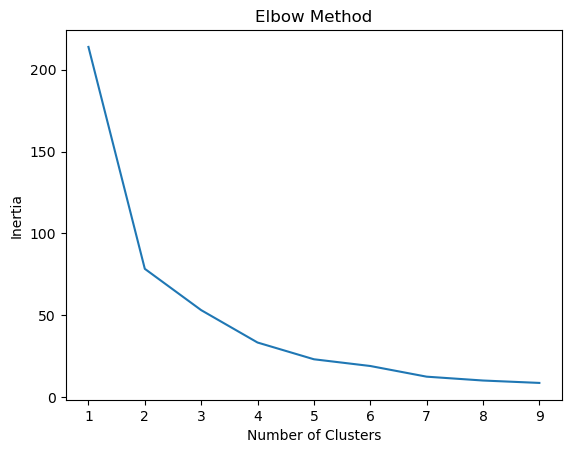

In [54]:
#uisng the elbow method to find the best k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting KMeans models starting from k=1 to k=10
kmeans_models = [KMeans(n_clusters=k).fit(X_pca) for k in range(1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

# Plotting the inertia values as a function of k
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'encoded_cluster_df' is your DataFrame containing the data

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of k values from 3 to 7
for k in range(2, 10):  # Note that the upper limit in range() is exclusive, so use 8 to include 7
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Print the silhouette score for the current k
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.6378
Silhouette Score for k=3: 0.5999
Silhouette Score for k=4: 0.6138
Silhouette Score for k=5: 0.5273
Silhouette Score for k=6: 0.5016
Silhouette Score for k=7: 0.5088
Silhouette Score for k=8: 0.5030
Silhouette Score for k=9: 0.4576


In [56]:
from sklearn.cluster import KMeans

# Assuming 'encoded_cluster_df' is your DataFrame containing the data
k_values = [2, 3, 8]
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to find centroids
    labels = kmeans.predict(X_pca)  # Predicting the cluster labels based on the fitted model
    cluster_labels[k] = labels

# Print labels for one of the k values
print("Labels for k=2:", cluster_labels[2])

Labels for k=2: [0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0
 0 1 0 1 0 0 0 1 1]


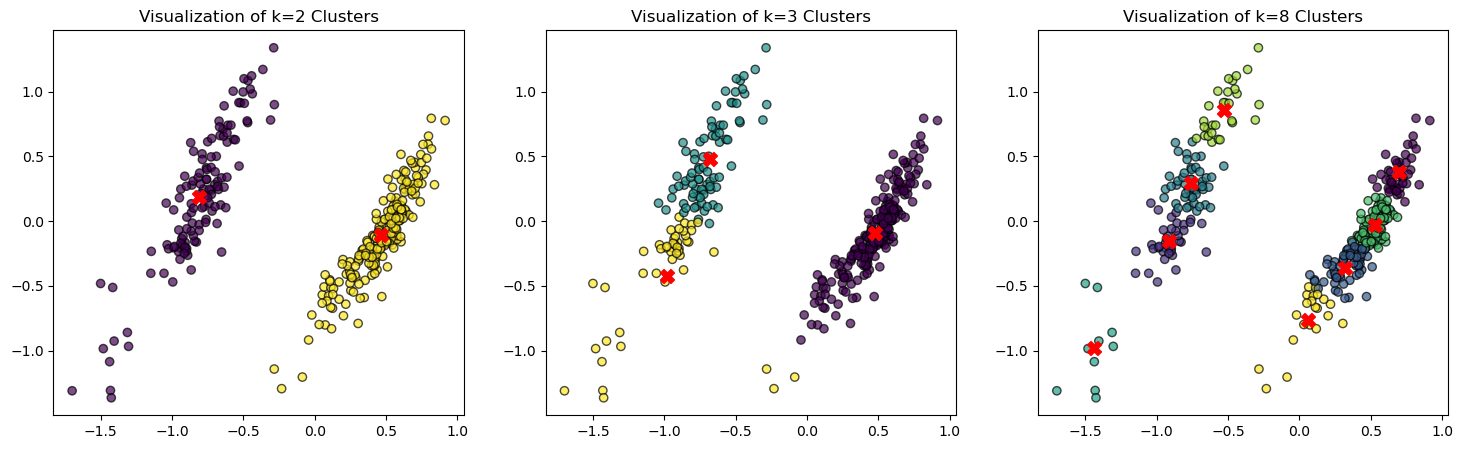

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X_pca' is your precomputed PCA data ready for clustering and visualization

# Selected k values to visualize
k_values = [2,3,8]

# Set up the plot
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5))  # Create a subplot for each selected k

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to the PCA reduced data
    labels = kmeans.predict(X_pca)  # Predicting cluster labels on the same data

    # Scatter plot of the reduced data with color by cluster label
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Visualization of k={k} Clusters')
    # Optionally, plot centroids
    centroids = kmeans.cluster_centers_
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')  # Plot centroids

plt.show()

In [58]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

In [59]:
# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = labels

In [60]:
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_itb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster
0,Aaron Hunt,0,0,0,0,1,0,1,2,0,1,0,0,1,90,0,2,6,0,1,2,2,90,0,1,0,34,11,16,0,0,0,0,0,0,1,0,1,59,2,0,1.533333,0.405188,0.768627,0.452381,0.000000,0.706284,FW,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,90.0,0.0,2.0,6.0,0.0,1.0,2.0,2.0,90.0,0.0,1.0,0.0,34.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,59.0,2.0,0.0,0
1,Aaron Ramsey,0,2,2,4,2,6,1,7,0,2,1,2,2,180,1,19,17,4,3,3,7,178,0,1,0,98,16,40,0,0,3,3,2,1,3,2,0,165,3,0,1.777473,0.295057,0.857158,0.562302,0.046970,0.976531,FWL,2,0.0,1.0,1.0,2.0,1.0,3.0,0.5,3.5,0.0,1.0,0.5,1.0,1.0,90.0,0.5,9.5,8.5,2.0,1.5,1.5,3.5,89.0,0.0,0.5,0.0,49.0,8.0,20.0,0.0,0.0,1.5,1.5,1.0,0.5,1.5,1.0,0.0,82.5,1.5,0.0,1
2,Adam Lallana,1,3,0,5,0,1,1,2,0,0,0,1,3,180,0,7,6,9,0,0,1,150,0,2,0,50,10,27,0,0,4,2,1,0,1,0,2,92,1,0,1.370879,0.178527,0.724273,0.334096,0.000000,1.223047,FWL,2,0.5,1.5,0.0,2.5,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.5,1.5,90.0,0.0,3.5,3.0,4.5,0.0,0.0,0.5,75.0,0.0,1.0,0.0,25.0,5.0,13.5,0.0,0.0,2.0,1.0,0.5,0.0,0.5,0.0,1.0,46.0,0.5,0.0,1
3,Adam Szalai,26,22,1,15,1,10,1,3,1,3,5,2,17,900,4,49,32,11,2,2,3,820,0,8,0,118,34,91,0,0,13,9,4,2,4,0,1,271,18,2,1.086630,0.166279,0.686968,0.214976,0.036769,1.119554,FW,10,2.6,2.2,0.1,1.5,0.1,1.0,0.1,0.3,0.1,0.3,0.5,0.2,1.7,90.0,0.4,4.9,3.2,1.1,0.2,0.2,0.3,82.0,0.0,0.8,0.0,11.8,3.4,9.1,0.0,0.0,1.3,0.9,0.4,0.2,0.4,0.0,0.1,27.1,1.8,0.2,0
4,Ademola Lookman,1,0,0,0,0,0,0,1,0,0,1,2,1,90,0,3,3,1,1,1,2,76,0,0,0,23,5,12,0,0,2,0,2,0,0,1,0,42,1,0,1.000000,0.185460,0.568116,0.284091,0.000000,0.947538,FWL,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,90.0,0.0,3.0,3.0,1.0,1.0,1.0,2.0,76.0,0.0,0.0,0.0,23.0,5.0,12.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,42.0,1.0,0.0,1


In [61]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,90.0,0.0,2.0,6.0,0.0,1.0,2.0,2.0,90.0,0.0,1.0,0.0,34.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,59.0,2.0,0.0,1.533333,0.405188,0.768627,0.452381,0.000000,0.706284,FW
1,0.0,1.0,1.0,2.0,1.0,3.0,0.5,3.5,0.0,1.0,0.5,1.0,1.0,90.0,0.5,9.5,8.5,2.0,1.5,1.5,3.5,89.0,0.0,0.5,0.0,49.0,8.0,20.0,0.0,0.0,1.5,1.5,1.0,0.5,1.5,1.0,0.0,82.5,1.5,0.0,1.777473,0.295057,0.857158,0.562302,0.046970,0.976531,FWL
2,0.5,1.5,0.0,2.5,0.0,0.5,0.5,1.0,0.0,0.0,0.0,0.5,1.5,90.0,0.0,3.5,3.0,4.5,0.0,0.0,0.5,75.0,0.0,1.0,0.0,25.0,5.0,13.5,0.0,0.0,2.0,1.0,0.5,0.0,0.5,0.0,1.0,46.0,0.5,0.0,1.370879,0.178527,0.724273,0.334096,0.000000,1.223047,FWL
3,2.6,2.2,0.1,1.5,0.1,1.0,0.1,0.3,0.1,0.3,0.5,0.2,1.7,90.0,0.4,4.9,3.2,1.1,0.2,0.2,0.3,82.0,0.0,0.8,0.0,11.8,3.4,9.1,0.0,0.0,1.3,0.9,0.4,0.2,0.4,0.0,0.1,27.1,1.8,0.2,1.086630,0.166279,0.686968,0.214976,0.036769,1.119554,FW
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,90.0,0.0,3.0,3.0,1.0,1.0,1.0,2.0,76.0,0.0,0.0,0.0,23.0,5.0,12.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,42.0,1.0,0.0,1.000000,0.185460,0.568116,0.284091,0.000000,0.947538,FWL


In [62]:
# Drop the 'pos_role' column from clustering_features
clustering_features = [col for col in clustering_features if col != 'pos_role']

# Calculate the average performance metrics for each cluster
cluster_performance = aggregated_df.groupby('cluster')[clustering_features].mean()

# Show the cluster performance DataFrame
print("Average performance metrics for each cluster:")
print(cluster_performance)

Average performance metrics for each cluster:
         average_aerials_l  average_aerials_w  average_assists  \
cluster                                                          
0                 3.657422           2.359175         0.083184   
1                 1.621132           0.918919         0.115706   

         average_chances2score  average_clearances  average_countattack  \
cluster                                                                   
0                     1.220278            0.454071             1.564676   
1                     0.975432            0.377503             1.647082   

         average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
cluster                                                                     
0                   0.329558               0.781472              0.030055   
1                   0.848830               1.741085              0.068522   

         average_drib_success  average_drib_unsuccess  average_dribbled_past  \

In [63]:
cluster_performance

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.657422,2.359175,0.083184,1.220278,0.454071,1.564676,0.329558,0.781472,0.030055,0.653262,0.558191,0.243333,1.409376,90.644079,0.239212,3.972133,3.969832,0.793031,0.310536,0.759227,0.749749,79.459895,0.012415,0.568954,0.000768,14.381894,3.972829,9.332238,0.000905,0.0,0.996372,0.696004,0.351161,0.068475,0.519288,0.171209,0.402743,31.859009,1.243388,0.095435,1.061112,0.152015,0.661774,0.244327,0.020576,0.939780
1,1.621132,0.918919,0.115706,0.975432,0.377503,1.647082,0.848830,1.741085,0.068522,1.129691,0.802158,0.406277,0.989125,90.000000,0.201432,4.220021,5.588318,1.436279,0.506823,1.279476,1.072382,78.657672,0.002506,0.291863,0.000000,23.948994,5.183140,11.457288,0.000500,0.0,0.973015,0.584708,0.473444,0.100374,0.852283,0.294604,0.617851,45.304820,1.376534,0.065242,1.161091,0.156437,0.677395,0.313433,0.018812,0.897942


<Figure size 1400x1000 with 0 Axes>

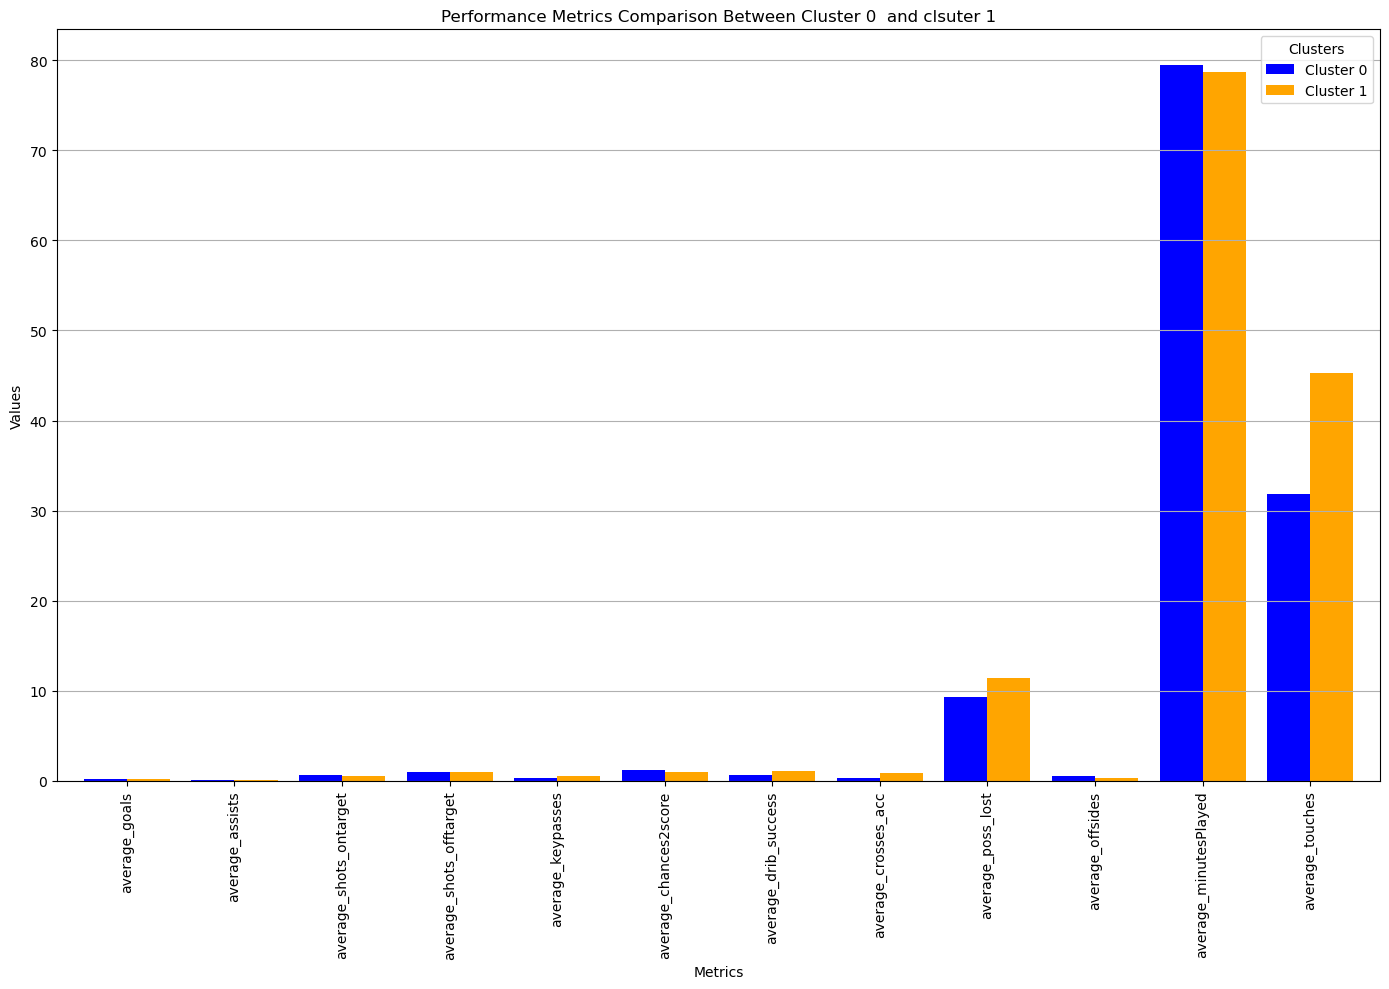

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cluster_performance' is your DataFrame
# Define the performance metrics
metrics = [
'average_goals',
'average_assists',
'average_shots_ontarget',
'average_shots_offtarget',
'average_keypasses',
'average_chances2score',
'average_drib_success',
'average_crosses_acc',
'average_poss_lost',
'average_offsides',
'average_minutesPlayed',
'average_touches'
]

# Filter DataFrame to include only relevant metrics
df = cluster_performance[metrics]

# Transpose the DataFrame for better plotting
df_transposed = df.T
df_transposed.columns = ['Cluster 0', 'Cluster 1']

# Plotting
plt.figure(figsize=(14, 10))
ax = df_transposed.plot(kind='bar', figsize=(14, 10), width=0.8, color=['blue', 'orange'])
plt.title('Performance Metrics Comparison Between Cluster 0  and clsuter 1')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='Clusters')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Analysis:
Cluster 0 has higher values in average_goals, average_shots_ontarget, average_shots_offtarget, average_chances2score, and average_poss_lost (lower is better).
Cluster 1 excels in average_assists, average_keypasses, average_drib_success, and average_crosses_acc.
Conclusion:
Cluster 0 generally has better scores in direct goal-scoring metrics (average_goals, average_shots_ontarget, etc.), which are crucial for a forward's high performance. However, Cluster 1 performs better in creating chances for others (assists, key passes, dribbles, crosses), which can be equally important depending on the team's style of play.

So, if the focus is purely on goal-scoring and finishing, Cluster 0 would be considered to have higher scores. If creating opportunities and contributing to the overall team play is valued, Cluster 1 would be stronger.

Comparative Analysis of Forward Player Clusters
Cluster 0: Balanced Role Forwards

Aerial Duels: Players in Cluster 0 are more engaged in aerial duels, with moderate success rates, suggesting they frequently contest headers in both offensive and defensive situations.
Assists and Key Passes: The average number of assists and key passes is relatively low, indicating that these players are less focused on creating goal-scoring opportunities for others and may not be primary playmakers.
Chances to Score and Goals: These forwards generate a decent number of scoring chances, but their goal-scoring average is lower, suggesting they play a supporting role rather than being primary goal scorers.
Defensive Contributions: With moderate clearances and some involvement in ground duels, these players occasionally contribute to defensive duties, likely dropping back when necessary.
Counter-Attacks and Crosses: Players in this cluster are involved in counter-attacking plays but have lower accuracy in crossing, indicating they may not be the primary wide players or crossers.
Dribbling and Fouls: They have a balanced dribbling success rate and are moderately successful in drawing fouls, highlighting their capability to challenge defenders but without excessive risk-taking.
Overall Involvement: With fewer touches and passes, players in Cluster 0 have a more focused and perhaps situational role, engaging in key moments rather than being constantly involved in the game’s flow.
Cluster 1: Creative and Technical Forwards

Aerial Duels: Cluster 1 players engage less in aerial duels, with lower success rates, suggesting a focus on ground play rather than aerial battles.
Assists and Key Passes: These players have a slightly higher average of assists and key passes, indicating a more significant role in creating goal-scoring opportunities for their teammates, potentially acting as playmakers.
Chances to Score and Goals: While they generate slightly fewer chances and score at a similar rate to Cluster 0, their involvement in other offensive metrics suggests a more diversified attacking role.
Defensive Contributions: Players in this cluster are less involved in defensive actions like clearances but are highly effective in ground duels, which could imply a strong physical presence in their attacking play.
Counter-Attacks and Crosses: They are more active in counter-attacks and crossing, though with varying accuracy, which may reflect a role on the wings or in situations requiring quick transitions.
Dribbling and Fouls: With higher dribbling attempts and success, these players are more aggressive in taking on defenders, often drawing fouls, which indicates a riskier, more dynamic playing style.
Overall Involvement: Players in Cluster 1 are significantly more involved in the game, as evidenced by their higher number of touches and passes. This suggests they are central to their team’s play, often dictating the tempo and creating opportunities.
Conclusion:
Cluster 0 represents forwards with a balanced role, contributing across various phases of the game with moderate success in both defensive and offensive metrics.
Cluster 1 is characterized by more creative and technically inclined forwards, who are central to their team’s attacking strategies, showing higher involvement in playmaking and ball distribution.


In [66]:
#using the test on the clusters from the train_val
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
13235,Premier League 2017-18,2018-02-03,"Arsenal - Everton, 5 - 1",Everton,FW,FW,Oumar Niasse,WhoScored,0,0,0,0,2,1,1,2,1,0,27,10,1,1,1,0,0,4,3,4,3,5,3,2,1,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,1.214286,0.186576,0.710084,0.207317,0.959059,0.000000,0,1,0,78,90
1703,Bundesliga 2017-18,2017-08-19,"Hoffenheim - Werder Bremen, 1 - 0",Werder Bremen,FW,FW,Fin Bartels,WhoScored,0,0,0,0,0,0,0,1,0,1,26,16,1,0,0,1,0,1,6,1,0,7,0,1,0,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.153846,0.085279,0.692308,0.230769,1.687234,0.000000,0,1,0,75,90
2058,Premier League 2017-18,2017-08-20,"Huddersfield - Newcastle United, 1 - 0",Newcastle United,FW,FW,Dwight Gayle,WhoScored,0,0,0,0,0,0,0,0,0,0,13,4,3,0,0,0,1,0,1,1,1,4,1,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0.857143,0.092976,0.605042,0.090909,0.674894,0.000000,0,1,0,52,90
17423,Premier League 2017-18,2018-04-17,"Brighton - Tottenham, 1 - 1",Tottenham,FW,FW,Harry Kane,WhoScored,0,1,0,1,2,0,3,2,0,1,36,18,3,0,0,2,2,8,5,0,2,10,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.200000,0.098525,0.653333,0.252874,1.848621,0.058824,0,0,0,85,90
13182,Premier League 2017-18,2018-02-03,"Leicester - Swansea, 1 - 1",Swansea,FW,FW,Jordan Ayew,WhoScored,0,0,0,0,0,0,0,0,3,0,35,17,1,0,0,0,0,7,10,4,2,10,2,2,0,1,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.933333,0.103263,0.592982,0.300000,0.506170,0.000000,0,0,0,92,90


In [67]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','goals_ag_otb',
'goals_ag_itb',
'saves_otb',
'saved_pen']

# Remove specified columns from the DataFrame
player_test_clustering= player_test_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test_clustering.head())

            date pos_role        player  goals  assists  shots_ontarget  \
13235 2018-02-03       FW  Oumar Niasse      0        0               0   
1703  2017-08-19       FW   Fin Bartels      0        0               0   
2058  2017-08-20       FW  Dwight Gayle      0        0               0   
17423 2018-04-17       FW    Harry Kane      1        0               1   
13182 2018-02-03       FW   Jordan Ayew      0        0               0   

       shots_offtarget  shotsblocked  chances2score  drib_success  \
13235                2             1              1             2   
1703                 0             0              0             1   
2058                 0             0              0             0   
17423                2             0              3             2   
13182                0             0              0             0   

       drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  \
13235               1          0       27          10          

In [68]:
player_test_clustering.shape

(520, 49)

In [69]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_test_clustering.columns.difference(['date', 'player','pos_role'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals','flow_success']

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'minutesPlayed',
       'missed_penalties', 'offsides', 'owngoals', 'passes_acc',
       'passes_inacc', 'poss_lost', 'rcards', 'saves_itb', 'shots_offtarget',
       'shots_ontarget', 'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc',
       'tballs_inacc', 'touches', 'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals', 'flow_success']


In [70]:
import pandas as pd

# Assuming player_train_val_clustering is the DataFrame with your data

# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_test_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_test_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Get the first 'pos' role for each player
pos_role_df = player_test_clustering.groupby('player')['pos_role'].first().reset_index()

# Merge aggregated performance metrics, network metrics, and pos role
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')
aggregated_df = pd.merge(aggregated_df, pos_role_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_test_clustering.groupby('player')['date'].count().values

print("Aggregated performance, network metrics, and pos role for each player:")
print(aggregated_df.head())

Aggregated performance, network metrics, and pos role for each player:
                player  aerials_l  aerials_w  assists  chances2score  \
0           Aaron Hunt          7          1        0              5   
1         Aaron Lennon          2          0        0              0   
2          Adam Szalai          3          2        0              3   
3      Ademola Lookman          0          0        0              1   
4  Aleksandar Mitrovic          7          8        0              3   

   clearances  countattack  crosses_acc  crosses_inacc  dangmistakes  \
0           1            6            3              6             0   
1           0            7            0              3             0   
2           0            0            0              0             0   
3           0            0            0              0             0   
4           2            0            0              0             0   

   drib_success  drib_unsuccess  dribbled_past  fouls  game_dur

In [71]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_itb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played
0,Aaron Hunt,7,1,0,5,1,6,3,6,0,0,0,1,0,180,1,4,7,3,5,8,7,180,0,2,0,74,20,35,0,0,3,3,2,0,0,1,0,134,3,0,1.700000,0.347854,0.875000,0.375512,0.012821,1.153651,FW,2
1,Aaron Lennon,2,0,0,0,0,7,0,3,0,1,2,2,0,90,0,3,4,2,0,1,1,90,0,0,0,15,3,9,0,0,1,0,1,0,1,0,0,33,0,0,1.133333,0.193461,0.653333,0.216867,0.000000,0.000000,FWR,1
2,Adam Szalai,3,2,0,3,0,0,0,0,0,1,0,0,1,90,2,5,8,0,0,1,0,90,0,1,0,18,4,10,0,0,2,3,0,0,0,0,0,42,8,1,1.333333,0.172352,0.768627,0.258065,0.095238,1.214808,FW,1
3,Ademola Lookman,0,0,0,1,0,0,0,0,0,2,1,0,1,90,0,2,2,0,0,1,0,59,0,0,0,25,3,5,0,0,2,0,1,0,0,1,1,37,0,0,1.200000,0.108971,0.653333,0.228261,0.000000,1.115831,FWR,1
4,Aleksandar Mitrovic,7,8,0,3,2,0,0,0,0,0,2,0,2,90,0,4,2,1,0,0,1,89,0,2,0,6,8,17,0,0,2,2,1,0,0,0,0,33,2,1,1.076923,0.149480,0.692308,0.209877,0.000000,1.518511,FW,1
5,Alex Pritchard,2,0,0,1,0,1,2,0,0,1,4,0,0,90,0,6,3,0,1,1,2,90,0,0,0,13,9,15,0,0,1,0,0,0,2,0,4,33,0,0,1.266667,0.343355,0.653333,0.295775,0.000000,0.467234,FW,1
6,Alexander Esswein,2,2,0,2,0,1,2,4,0,0,0,1,5,180,1,8,9,2,1,1,1,156,0,1,0,31,9,18,0,0,1,3,1,0,1,0,0,64,3,0,1.222527,0.133280,0.713030,0.238248,0.033333,1.012340,FW,2
7,Alexander Srrloth,5,5,0,1,1,0,0,3,0,0,1,0,2,90,0,5,8,0,0,1,2,90,0,2,0,15,6,14,0,0,1,1,0,0,0,0,0,42,0,0,1.538462,0.332973,0.852071,0.367647,0.000000,0.837799,FW,1
8,Alexandre Lacazette,8,3,1,8,0,9,1,1,0,0,1,1,3,360,2,11,18,3,2,2,2,336,0,4,0,90,17,30,0,0,3,7,0,0,5,1,1,152,2,0,1.100000,0.099681,0.650416,0.267047,0.040530,1.442218,FW,4
9,Alexis Sanchez,7,2,0,1,0,6,2,5,0,2,0,0,0,180,0,10,12,4,2,3,7,180,0,1,0,71,18,30,0,0,1,0,1,0,3,2,6,123,2,0,1.400000,0.267040,0.728173,0.363963,0.000000,0.620268,FWL,2


In [72]:
# Assuming 'pos_encoded' is the column name for the encoded pos role
# Exclude 'pos_encoded' from the averaging process but still include it in clustering
performance_metric_columns_for_averaging = [col for col in performance_metric_columns if col != 'pos_role']

# Calculate the average performance metrics for each player, excluding 'pos_encoded'
for column in performance_metric_columns_for_averaging:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering, plus 'pos_encoded'
average_performance_columns = [f'average_{column}' for column in performance_metric_columns_for_averaging]

# Combine average performance metrics, network metrics, and 'pos_encoded' for clustering
clustering_features = average_performance_columns + network_metrics_columns + ['pos_role']

print("Aggregated DataFrame with average performance metrics, network metrics, and pos role:")
print(aggregated_df[['player'] + clustering_features])

Aggregated DataFrame with average performance metrics, network metrics, and pos role:
                        player  average_aerials_l  average_aerials_w  \
0                   Aaron Hunt           3.500000           0.500000   
1                 Aaron Lennon           2.000000           0.000000   
2                  Adam Szalai           3.000000           2.000000   
3              Ademola Lookman           0.000000           0.000000   
4          Aleksandar Mitrovic           7.000000           8.000000   
5               Alex Pritchard           2.000000           0.000000   
6            Alexander Esswein           1.000000           1.000000   
7            Alexander Srrloth           5.000000           5.000000   
8          Alexandre Lacazette           2.000000           0.750000   
9               Alexis Sanchez           3.500000           1.000000   
10          Alfred Finnbogason           4.666667           1.333333   
11               Alvaro Morata           3.000000 

In [73]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [74]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,3.5,0.5,0.0,2.5,0.5,3.0,1.5,3.0,0.0,0.0,0.0,0.5,0.0,90.0,0.5,2.0,3.5,1.5,2.5,4.0,3.5,90.0,0.0,1.0,0.0,37.0,10.0,17.5,0.0,0.0,1.5,1.5,1.0,0.0,0.0,0.5,0.0,67.0,1.5,0.0,1.700000,0.347854,0.875000,0.375512,0.012821,1.153651,FW
1,2.0,0.0,0.0,0.0,0.0,7.0,0.0,3.0,0.0,1.0,2.0,2.0,0.0,90.0,0.0,3.0,4.0,2.0,0.0,1.0,1.0,90.0,0.0,0.0,0.0,15.0,3.0,9.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,33.0,0.0,0.0,1.133333,0.193461,0.653333,0.216867,0.000000,0.000000,FWR
2,3.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0,2.0,5.0,8.0,0.0,0.0,1.0,0.0,90.0,0.0,1.0,0.0,18.0,4.0,10.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,42.0,8.0,1.0,1.333333,0.172352,0.768627,0.258065,0.095238,1.214808,FW
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,90.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,59.0,0.0,0.0,0.0,25.0,3.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,37.0,0.0,0.0,1.200000,0.108971,0.653333,0.228261,0.000000,1.115831,FWR
4,7.0,8.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,90.0,0.0,4.0,2.0,1.0,0.0,0.0,1.0,89.0,0.0,2.0,0.0,6.0,8.0,17.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,33.0,2.0,1.0,1.076923,0.149480,0.692308,0.209877,0.000000,1.518511,FW


In [75]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode 'pos_role'
one_hot_encoder = OneHotEncoder(sparse_output=False)
pos_role_encoded = one_hot_encoder.fit_transform(features[['pos_role']])

# Create a DataFrame with the encoded 'pos_role'
pos_role_encoded_df = pd.DataFrame(pos_role_encoded, columns=one_hot_encoder.get_feature_names_out(['pos_role']))

# Drop the original 'pos_role' column from the features DataFrame
features_without_pos_role = features.drop(columns=['pos_role'])

# Apply Min-Max scaling to the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_without_pos_role)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_without_pos_role.columns)

# Combine the scaled features with the one-hot encoded 'pos_role'
features_scaled = pd.concat([scaled_features_df, pos_role_encoded_df], axis=1)

# Show the final DataFrame with scaled features and one-hot encoded 'pos_role'
print("Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':")
print(features_scaled.head())

Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':
   average_aerials_l  average_aerials_w  average_assists  \
0           0.269231           0.039474              0.0   
1           0.153846           0.000000              0.0   
2           0.230769           0.157895              0.0   
3           0.000000           0.000000              0.0   
4           0.538462           0.631579              0.0   

   average_chances2score  average_clearances  average_countattack  \
0                  0.625               0.125             0.315789   
1                  0.000               0.000             0.736842   
2                  0.750               0.000             0.000000   
3                  0.250               0.000             0.000000   
4                  0.750               0.500             0.000000   

   average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
0                  0.3                  0.375                   0.0   
1    

In [76]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[-0.22065769 -1.14925655]
 [-0.94243483  0.1918777 ]
 [ 0.42833255 -0.71999816]
 [-0.73885292  0.29014636]
 [ 0.60187323 -0.62696126]
 [-0.06499126 -0.2830748 ]
 [ 0.31945475 -0.01361417]
 [ 0.25108622 -0.53165208]
 [ 0.30643326 -0.13204516]
 [-1.27847058 -0.02794418]
 [ 0.412731   -0.1468011 ]
 [ 0.40728294 -0.05962134]
 [-1.02531086  0.00488656]
 [-0.76842499  0.96480134]
 [ 0.48745979  0.20984735]
 [ 0.43471146 -0.00601379]
 [ 0.32376185 -0.104221  ]
 [ 0.34515662 -0.11044291]
 [-0.83435482 -0.01226125]
 [-1.04321982 -0.17336456]
 [ 0.56366995 -0.12742655]
 [-0.0797188  -0.66124371]
 [ 0.19391576 -0.11029139]
 [-0.83717987  0.01916115]
 [ 0.66977976  0.33570266]
 [ 0.1673146  -0.81116703]
 [ 0.57582155 -0.28706416]
 [ 0.76994255  0.71662119]
 [ 0.22010673 -0.42722714]
 [ 0.49124683  0.2373991 ]
 [-1.15092139 -0.54116496]
 [ 0.47942819  0.35278933]
 [ 0.35093354 -0.19708571]
 [ 0.61940775  0.37919812]
 [-1.19451745  0.0714041 ]
 [ 0.38332211 -0.46700202]


In [77]:
kmeans

KMeans(n_clusters=2)

In [78]:
import numpy as np

# Fit the KMeans model (if not already fitted) and get the cluster centers
cluster_labels = kmeans.predict(X_pca)
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = cluster_labels

# Calculate the distance of each player to the cluster centroid
distances = []
for i, row in aggregated_df.iterrows():
    cluster = row['cluster']
    centroid = centroids[cluster]
    player_features = X_pca[i]
    distance = np.linalg.norm(player_features - centroid)
    distances.append(distance)

aggregated_df['distance_to_centroid'] = distances

# Sort players within each cluster based on their distance to the centroid
aggregated_df['rank_within_cluster'] = aggregated_df.groupby('cluster')['distance_to_centroid'].rank()

# Sort the players based on cluster rank and distance to centroid
sorted_players = aggregated_df.sort_values(by=['rank_within_cluster', 'player'])

# Display the sorted players
print("Sorted players by cluster performance and distance to centroid:")
print(sorted_players[['player', 'cluster', 'distance_to_centroid', 'rank_within_cluster']])

Sorted players by cluster performance and distance to centroid:
                        player  cluster  distance_to_centroid  \
151            Pablo De Blasis        1              0.045936   
177                 Shane Long        0              0.030499   
49              Daniel Ginczek        0              0.031709   
117             Levin Oztunali        1              0.062319   
167                 Sadio Mane        1              0.069406   
172              Sandro Wagner        0              0.039927   
94              Jerome Gondorf        1              0.122615   
176            Serhou Guirassy        0              0.046642   
3              Ademola Lookman        1              0.127598   
81                  Harry Kane        0              0.048578   
1                 Aaron Lennon        1              0.134365   
77           Guido Burgstaller        0              0.050007   
156  Pierre-Emerick Aubameyang        1              0.143731   
189            Tim Kleindi

In [79]:
cluster_1_players = sorted_players[sorted_players['cluster'] == 1]
cluster_0_players = sorted_players[sorted_players['cluster'] == 0]

In [80]:
cluster_1_players.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_itb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
151,Pablo De Blasis,17,7,0,1,3,2,1,2,0,2,0,1,7,270,1,11,8,6,1,8,4,270,0,4,0,88,21,35,0,0,2,2,1,0,1,1,2,153,2,0,1.444444,0.296050,0.740160,0.396131,0.014493,0.635848,FWL,3,5.666667,2.333333,0.000000,0.333333,1.000000,0.666667,0.333333,0.666667,0.0,0.666667,0.000000,0.333333,2.333333,90.0,0.333333,3.666667,2.666667,2.000000,0.333333,2.666667,1.333333,90.000000,0.0,1.333333,0.0,29.333333,7.000000,11.666667,0.0,0.0,0.666667,0.666667,0.333333,0.000000,0.333333,0.333333,0.666667,51.000000,0.666667,0.000000,1,0.045936,1.0
117,Levin Oztunali,2,1,1,3,0,4,3,6,0,6,5,0,8,360,0,17,20,7,1,5,3,322,0,3,0,78,15,34,0,0,2,1,0,0,4,2,1,145,4,1,1.032143,0.170213,0.653815,0.268892,0.037433,0.797041,FWR,4,0.500000,0.250000,0.250000,0.750000,0.000000,1.000000,0.750000,1.500000,0.0,1.500000,1.250000,0.000000,2.000000,90.0,0.000000,4.250000,5.000000,1.750000,0.250000,1.250000,0.750000,80.500000,0.0,0.750000,0.0,19.500000,3.750000,8.500000,0.0,0.0,0.500000,0.250000,0.000000,0.000000,1.000000,0.500000,0.250000,36.250000,1.000000,0.250000,1,0.062319,2.0
167,Sadio Mane,10,8,0,13,2,12,2,6,0,7,6,1,4,450,3,18,22,2,1,5,4,407,0,0,0,156,25,58,0,0,9,8,2,0,0,1,6,255,2,0,1.275165,0.119819,0.714933,0.364566,0.036901,1.227416,FWL,5,2.000000,1.600000,0.000000,2.600000,0.400000,2.400000,0.400000,1.200000,0.0,1.400000,1.200000,0.200000,0.800000,90.0,0.600000,3.600000,4.400000,0.400000,0.200000,1.000000,0.800000,81.400000,0.0,0.000000,0.0,31.200000,5.000000,11.600000,0.0,0.0,1.800000,1.600000,0.400000,0.000000,0.000000,0.200000,1.200000,51.000000,0.400000,0.000000,1,0.069406,3.0
94,Jerome Gondorf,3,1,0,0,0,0,0,1,0,0,1,1,2,90,0,7,2,1,0,0,2,89,0,2,0,8,5,11,0,0,0,0,0,0,0,1,1,21,1,0,1.000000,0.091796,0.672222,0.211268,0.000000,1.509654,FWR,1,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,2.000000,90.0,0.000000,7.000000,2.000000,1.000000,0.000000,0.000000,2.000000,89.000000,0.0,2.000000,0.0,8.000000,5.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000,1.000000,0.000000,1,0.122615,4.0
3,Ademola Lookman,0,0,0,1,0,0,0,0,0,2,1,0,1,90,0,2,2,0,0,1,0,59,0,0,0,25,3,5,0,0,2,0,1,0,0,1,1,37,0,0,1.200000,0.108971,0.653333,0.228261,0.000000,1.115831,FWR,1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,1.000000,90.0,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,59.000000,0.0,0.000000,0.0,25.000000,3.000000,5.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,37.000000,0.000000,0.000000,1,0.127598,5.0
1,Aa

In [81]:
cluster_0_players.tail(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,saves_itb,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_saves_itb,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
180,Simon Zoller,3,2,0,1,0,0,0,0,0,2,0,1,1,90,0,2,4,0,1,0,2,63,0,0,0,4,2,3,0,0,1,0,0,0,1,0,0,15,1,0,0.733333,0.071587,0.593939,0.116883,0.000000,0.607404,FW,1,3.0,2.000000,0.0,1.000000,0.0,0.000000,0.00,0.0,0.0,2.0,0.000000,1.000000,1.000000,90.0,0.00,2.000000,4.000000,0.00,1.000000,0.000000,2.000000,63.0,0.000000,0.000000,0.0,4.00,2.000000,3.00,0.0,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,15.000000,1.000000,0.0,0,0.635269,125.0
86,Islam Slimani,7,5,0,1,0,3,0,1,0,1,0,0,1,90,1,6,7,2,0,0,0,90,0,2,0,35,7,11,0,0,0,2,0,0,0,1,0,67,1,0,1.466667,0.241194,0.816667,0.430108,0.057143,0.414139,FW,1,7.0,5.000000,0.0,1.000000,0.0,3.000000,0.00,1.0,0.0,1.0,0.000000,0.000000,1.000000,90.0,1.00,6.000000,7.000000,2.00,0.000000,0.000000,0.000000,90.0,0.000000,2.000000,0.0,35.00,7.000000,11.00,0.0,0.0,0.0,2.000000,0.000000,0.0,0.000000,1.000000,0.000000,67.000000,1.000000,0.0,0,0.664431,126.0
63,Fahad Al Muwallad,2,0,0,1,0,4,0,1,0,2,1,0,1,90,0,2,4,0,0,0,0,78,0,2,0,3,0,4,0,0,1,0,0,0,0,0,0,9,1,0,0.642857,0.067666,0.548701,0.060241,0.000000,1.214808,FW,1,2.0,0.000000,0.0,1.000000,0.0,4.000000,0.00,1.0,0.0,2.0,1.000000,0.000000,1.000000,90.0,0.00,2.000000,4.000000,0.00,0.000000,0.000000,0.000000,78.0,0.000000,2.000000,0.0,3.00,0.000000,4.00,0.0,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,9.000000,1.000000,0.0,0,0.675487,127.0
42,Chris Wood,4,6,0,0,0,0,0,0,0,0,0,0,0,90,0,4,1,1,0,0,0,65,0,0,0,10,2,7,0,0,0,0,0,0,0,0,0,21,0,0,0.928571,0.090820,0.635338,0.233333,0.000000,0.357297,FW,1,4.0,6.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,90.0,0.00,4.000000,1.000000,1.00,0.000000,0.000000,0.000000,65.0,0.000000,0.000000,0.0,10.00,2.000000,7.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,21.000000,0.000000,0.0,0,0.732625,128.0
194,Wilfried Zaha,2,0,1,4,0,10,1,3,0,5,4,0,6,180,2,20,26,1,0,1,0,180,0,5,0,37,12,30,0,0,3,4,1,0,1,0,0,94,5,1,1.104762,0.187133,0.661984,0.341667,0.023810,1.154068,FW,2,1.0,0.000000,0.5,2.000000,0.0,5.000000,0.50,1.5,0.0,2.5,2.000000,0.000000,3.000000,90.0,1.00,10.000000,13.000000,0.50,0.000000,0.500000,0.000000,90.0,0.000000,2.500000,0.0,18.50,6.000000,15.00,0.0,0.0,1.5,2.000000,0.500000,0.0,0.500000,0.000000,0.000000,47.000000,2.500000,0.5,0,0.746051,129.0
144,Mohammed Al-Sahlawi,9,3,0,1,0,0,0,0,0,0,0,0,2,90,0,1,0,0,0,0,0,85,0,0,0,4,0,3,0,0,2,0,1,0,0,0,0,11,0,0,0.714286,0.093272,0.524845,0.096386,0.000000,1.214808,FW,1,9.0,3.000000,0.0,1.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,2.000000,90.0,0.00,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,85.0,0.000000,